                                         
                                         Name student: NGUYEN THI HONG NHUNG
                                         Student ID: 81201080
                                         Department: Electronics Engineering 
                                         Email: nhungnguyen.uet@gmail.com 
                                         Asignmeent 1
                                         Subject: Machine Learning For Cyber Security 
                                         Professor: Suwon Hong 

In [3]:
import glob
import numpy as np
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [4]:
# Step 1. Load the dataset into variables
#----------------------------------------------------------------------

emails = [] # Mail texts
labels = [] # Labels(0 for ham, 1 for spam)

# Load ham mails
for filename in sorted(glob.glob('enron1/enron1/ham/*.txt')):
    with open(filename, 'r', encoding='ISO-8859-1') as infile:
        emails.append(infile.read())
        labels.append(0)
for filename in sorted(glob.glob('enron1/enron1/spam/*.txt')):
    with open(filename, 'r', encoding='ISO-8859-1') as infile:
        emails.append(infile.read())
        labels.append(1)

len(emails), len(labels) # Print out how much data we've loaded is

(5172, 5172)

In [5]:
# Step 2. Clean the texts
#----------------------------------------------------------------------

def letters_only(astr):
    return astr.isalpha()

all_names = set(names.words())
lemmatizer = WordNetLemmatizer()

def clean_text(docs):
    cleaned_docs = []
    for doc in docs:
        cleaned_docs.append(
            ' '.join([lemmatizer.lemmatize(word.lower())
                     for word in doc.split()
                         if letters_only(word)
                              and word not in all_names]))
    return cleaned_docs
            
cleaned_emails = clean_text(emails)

In [6]:
# First email before cleaning
emails[0]

'Subject: christmas tree farm pictures\n'

In [7]:
# First email after cleaning
cleaned_emails[0]

'christmas tree farm picture'

In [8]:
# cleaned_emails=np.array(cleaned_emails)
# labels=np.array(labels)

In [9]:
# Step 3. Split the dataset into train dataset and test dataset
#----------------------------------------------------------------------
X_train, X_test, Y_train, Y_test = train_test_split(cleaned_emails, labels, test_size=0.33, random_state=42)

In [10]:
# Step 4. Remove unused words and convert the dataset into a Document-Term Matrix
#----------------------------------------------------------------------
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english', max_features=500) # the input text is in English, consider most frequent 500 words only
term_docs_train = cv.fit_transform(X_train)
#term_train = cv.fit_transform(Y_train)
term_docs_test = cv.transform(X_test)

In [11]:
import numpy as np
# Step 5 (TODO). Apply the machine learning with a MultinomialNB object
#----------------------------------------------------------------------
# To achieve the goal:
# 1. Understand the entire codes
# 2. Search for MultinomialNB class and learn about it
# 3. Write correct codes below this comment
# 4. The code should train a Naive Bayes model and print out the model accuracy with the test dataset
# The expected model accuracy is 0.9197422378441711
#
# Hint1: Create a MultinomialNB object with the parameters: alpha=1.0 and fit_prior=True
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=1.0,fit_prior=True)
from sklearn.metrics import accuracy_score
# Hint2: Use fit() and score() method to get a result
#----------------------------------------------------------------------
# TODO: Write codes here
clf.fit(term_docs_train,Y_train)
y_pred = clf.predict(term_docs_test)
print("Accuaracy %.2f %%" % (100*accuracy_score(Y_test,y_pred)))

Accuaracy 91.97 %


In [12]:
#--------------------------------------------------------------
# TODO: Draw confusion matrix 
import matplotlib.pyplot as plt
import pandas as pd
from imblearn.metrics import classification_report_imbalanced
import seaborn as sns
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix
import itertools

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
    
def plot_confusion_matrix(cm, classes=None,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    mpl.rcParams.update(mpl.rcParamsDefault)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)
    plt.figure(figsize=(5, 5)) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(shrink=0.74)
    tick_marks = np.arange(len(list(range(cm.shape[0]))))
#     plt.xticks(tick_marks, classes, rotation=45)
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes,rotation=90)
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    return plt



Normalized confusion matrix
[[0.9275834  0.0724166 ]
 [0.10041841 0.89958159]]


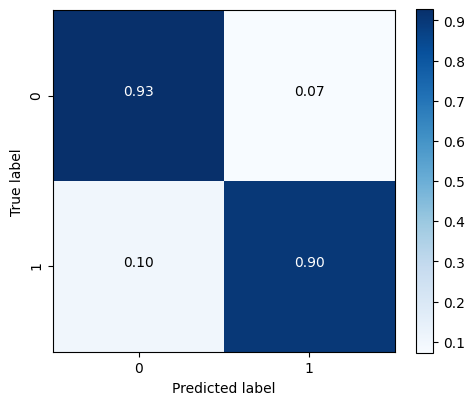

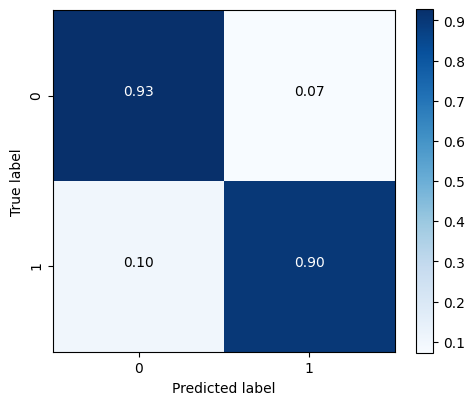

In [14]:
pred = clf.predict(term_docs_test)
# utils.confusion_plot(pred,data.y_test)
plot_confusion_matrix(confusion_matrix(Y_test,pred),  normalize=True,title=None)
plt.savefig("confusion matrix.pdf")
plt.show()